# I. Heart Attack Features Correlation Analysis

In [ ]:
## Package 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

## google drive mount 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Dataset 출처: https://www.kaggle.com/johnsmith88/heart-disease-dataset

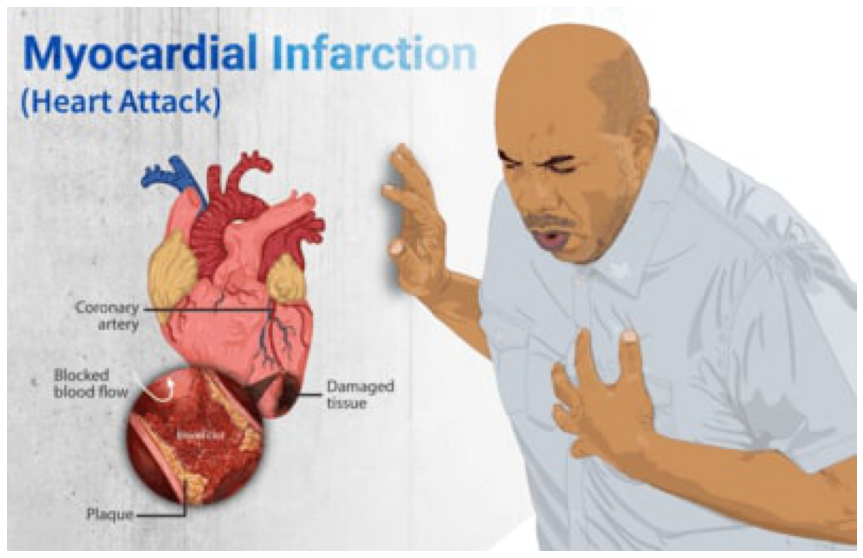

In [ ]:
asset_dir = '/content/gdrive/My Drive/Python_Programming/assets/'

column_pic = plt.imread(asset_dir + 'heart_attack.jpg')
plt.axis('off')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(column_pic)

### Load Dataset

In [ ]:
data_dir = '/content/gdrive/My Drive/Python_Programming/dataset/Heart_Disease/'

heart_disease = pd.read_csv(data_dir + 'heart_disease_dataset.csv')
heart_disease.head()

### Dataset Check

In [ ]:
heart_disease.info()

In [ ]:
print('unique entries in each column')
heart_disease.nunique()

In [ ]:
## Redefine columns
heart_disease.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 
                         'RestingECG', 'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 
                         'Thalassemia', 'Target']

## 1. Visual Analysis

In [ ]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':15,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':10,
            'ytick.labelsize':1})  

In [ ]:
## Histogram
heart_disease['Age'].hist(grid=False)

In [ ]:
## Categorical scatterplot 
sns.swarmplot(heart_disease['Age'])

In [ ]:
result=[]
for i in heart_disease['ChestPain']:
    if i == 0:
        result.append('Typical Angina')
    if i == 1:
        result.append('Atypical Angina')
    if i == 2:
        result.append('Non-Anginal')
    if i == 3:
        result.append('Asymptomatic')
        
heart_disease['ChestPainType']=pd.Series(result)

sns.swarmplot(x='ChestPainType', y='Age', data=heart_disease)

In [ ]:
## Relation of a element (major vessels) and chest pain type
ax=sns.countplot(hue=result, x='MajorVessels', data=heart_disease,palette='husl')

In [ ]:
## Pie chart 
ChestPain=(heart_disease['ChestPainType']).value_counts()
percent_typAng = ChestPain[0]*100/ len(heart_disease)
percent_AtypAng = ChestPain[1]*100/len(heart_disease)
percent_nonAng = ChestPain[2]*100/len(heart_disease)
percent_none = ChestPain[3]*100/len(heart_disease)

values= [percent_typAng, percent_AtypAng, percent_nonAng, percent_none]
labels=['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Chest Pain Type Percentage")    
plt.show()

In [ ]:
## Element (Gender) comparison 
ax = sns.countplot(hue=result, x='Gender', data=heart_disease, palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

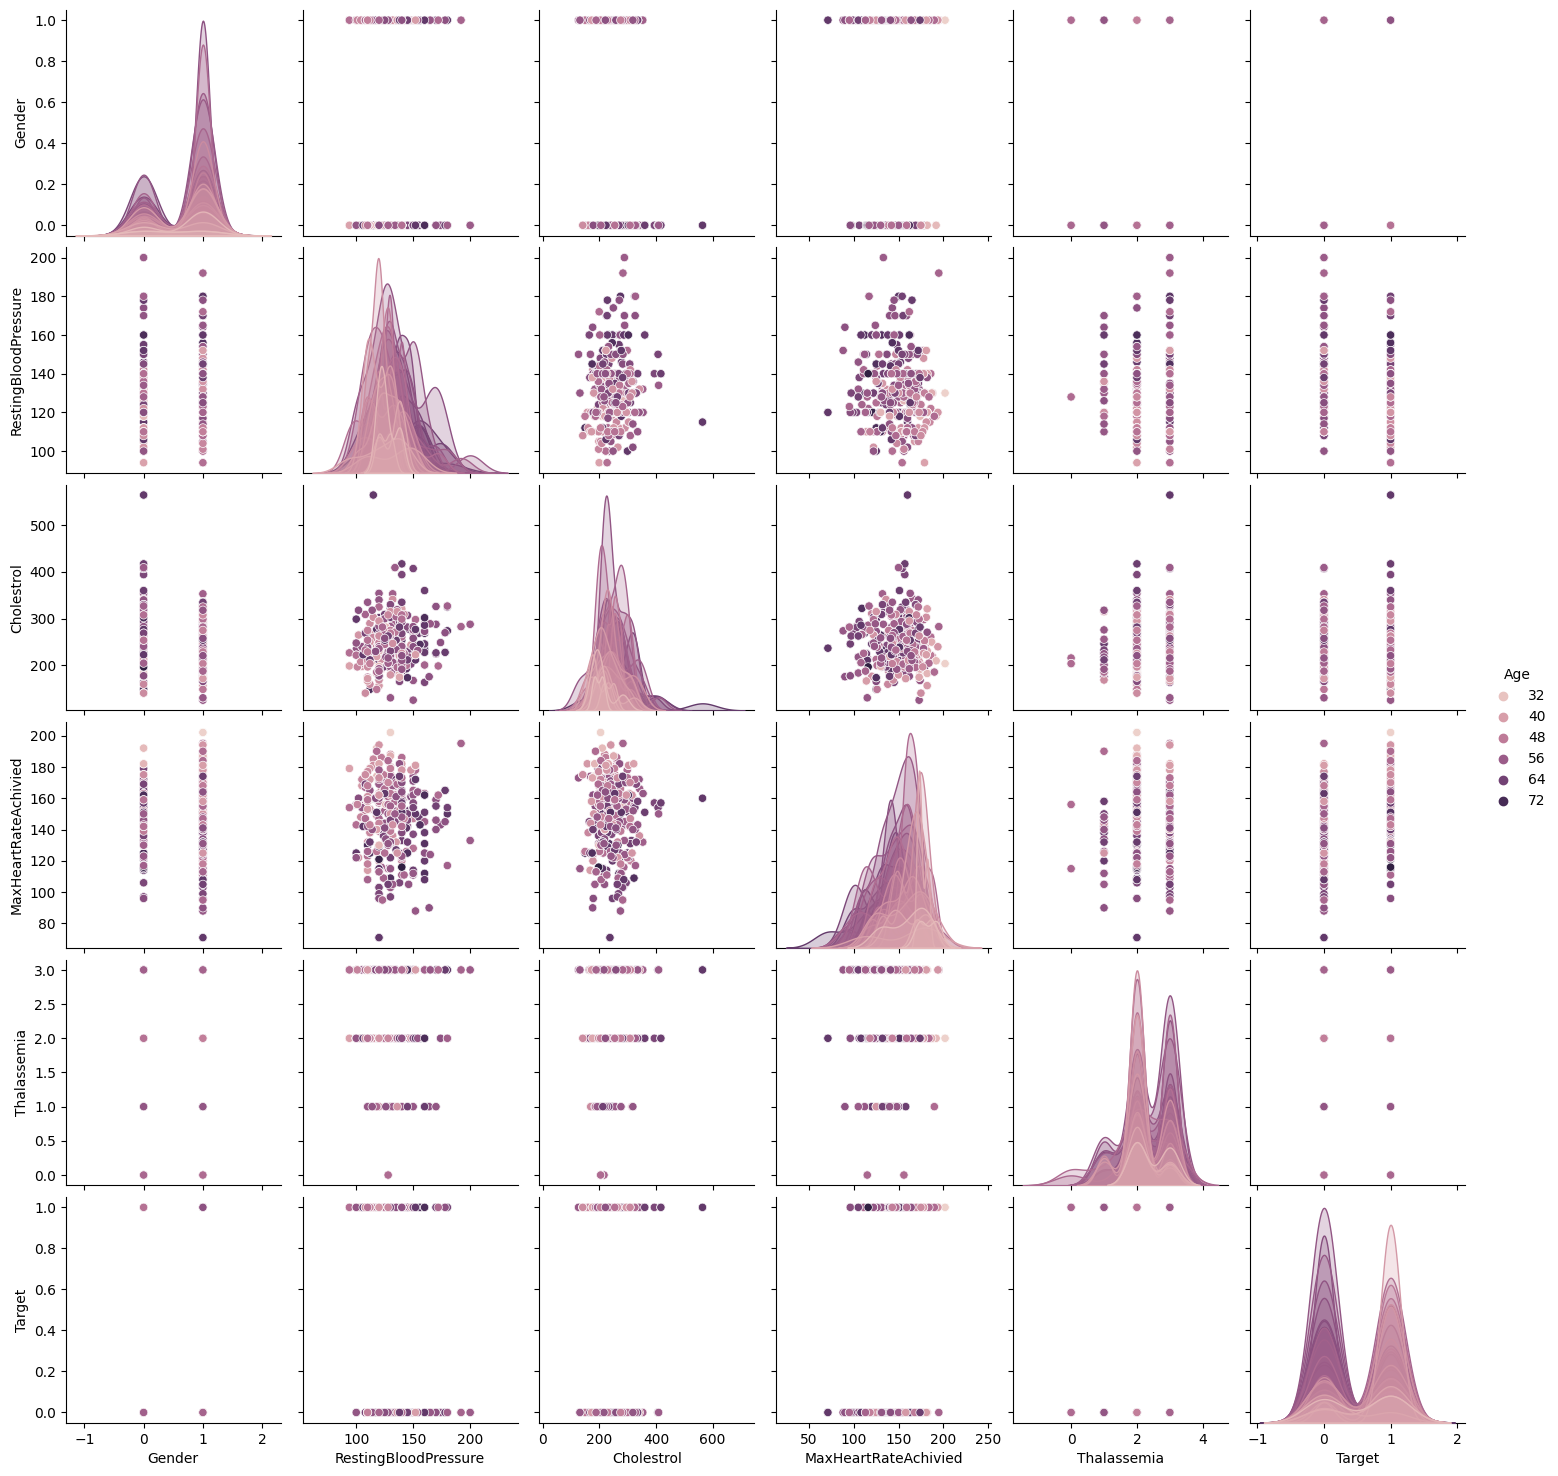

In [ ]:
## Pairplot
sns.pairplot(heart_disease[['Age','Gender','RestingBloodPressure','Cholestrol','MaxHeartRateAchivied','Thalassemia','Target']],hue="Age") ## hue: 변수

## 2. Correlation Analysis

In [ ]:
sns.reset_defaults()

plt.figure(figsize=(15,15))
sns.heatmap(data = heart_disease.corr(method = 'pearson'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = heart_disease.corr(method = 'spearman'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = heart_disease.corr(method = 'kendall'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

## 3. Linear Regression

In [ ]:
ax = sns.regplot(x='RestingBloodPressure', y='Cholestrol', data=heart_disease)

In [ ]:
ax = sns.lmplot(x='RestingBloodPressure', y='Cholestrol', row='ExerciseIndusedAngina', col='Gender', data=heart_disease)

# II. Heart Attack Prediction using Machine Learning Methods (Basic)

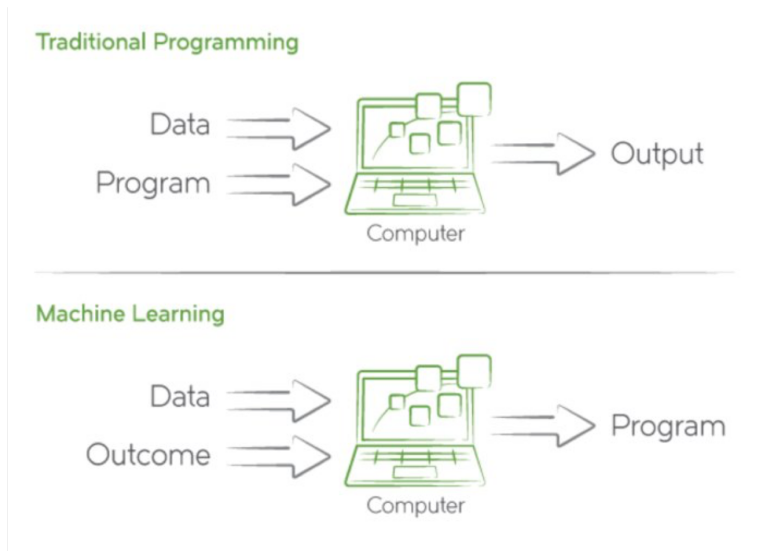

In [ ]:
column_pic = plt.imread(asset_dir + 'ml.png')
plt.axis('off')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(column_pic)

In [ ]:
# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 1. Dataset Splitting

In [ ]:
## Dataset Reset
heart_disease = pd.read_csv(data_dir + 'heart_disease_dataset.csv')
## Redifine columns
heart_disease.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 
                         'RestingECG', 'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 
                         'Thalassemia', 'Target']

y = heart_disease["Target"]
X = heart_disease.drop('Target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


print("Number of Train-set: ",len(y_train))
print("Number of Test-set: ",len(y_test))

X_train.head()

## 2. Machine Learning Model Training, Prediction, Evaluation

### Logistic Regression

In [ ]:
## (1) Model Selection
LR = LogisticRegression()

## (2) Model Training
LR_model = LR.fit(X_train, y_train)

## (3) Model Prediction 
LR_predict = LR_model.predict(X_test)

## (4) Model Evaluation
LR_conf_matrix = confusion_matrix(y_test, LR_predict)
LR_acc_score = accuracy_score(y_test, LR_predict)

print("\n***** Logistc Regression *****")
print("Confussion Matrix")
print(LR_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",LR_acc_score*100,'\n')
print(classification_report(y_test,LR_predict))

### Support Vector Machine (SVM)

In [ ]:
## (1) Model Selection
svm =  SVC() # SVC(kernel='rbf', C=350)

## (2) Model Training
svm.fit(X_train, y_train)

## (3) Model Prediction 
svm_predicted = svm.predict(X_test)

## (4) Model Evaluation
svm_conf_matrix = confusion_matrix(y_test, svm_predicted)
svm_acc_score = accuracy_score(y_test, svm_predicted)

print("\n***** SVM *****")
print("Confussion Matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svm_acc_score*100,'\n')
print(classification_report(y_test,svm_predicted))

### Decision Tree

In [ ]:
## (1) Model Selection
DT = DecisionTreeClassifier()
# DT = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)

## (2) Model Training
DT.fit(X_train, y_train)

## (3) Model Prediction 
DT_predicted = DT.predict(X_test)

## (4) Model Evaluation
DT_conf_matrix = confusion_matrix(y_test, DT_predicted)
DT_acc_score = accuracy_score(y_test, DT_predicted)

print("\n***** Decision Tree *****")
print("Confussion Matrix")
print(DT_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",DT_acc_score*100,'\n')
print(classification_report(y_test,DT_predicted))

### Random Forest

In [ ]:
## (1) Model Selection
RF = RandomForestClassifier()
# RF = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=10)

## (2) Model Training
RFmodel = RF.fit(X_train,y_train)

## (3) Model Prediction 
RF_predicted = RF.predict(X_test)

## (4) Model Evaluation
RF_conf_matrix = confusion_matrix(y_test, RF_predicted)
RF_acc_score = accuracy_score(y_test, RF_predicted)

print("\n***** Random Forest *****")
print("Confussion Matrix")
print(RF_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",RF_acc_score*100,'\n')
print(classification_report(y_test,RF_predicted))